In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
datos = pd.read_excel("Encuestas soldados.xlsx")

In [4]:
# firstly, we must correct some misspelled words in the dataset.
datos['CONSUMO'] = datos['CONSUMO'].replace(['Cigarillo', 'CIGARILLO'], 'cigarrillo')
datos['CONSUMO'] = datos['CONSUMO'].replace('todo', 'cigarrillo, alcohol, marihuana, otras')
datos['CUAL'] = datos['CUAL'].replace('perico,tusi', 'cocaina,tusi')
datos['CUAL'] = datos['CUAL'].replace('marihuana, cocaina y tusi', 'marihuana, cocaina, tusi')
datos['CUAL'] = datos['CUAL'].replace('cigarrilo', 'cigarrillo')
datos['RAZON_CONSUMO'] = datos['RAZON_CONSUMO'].replace('escapar de problemas', 'escapar problemas')
datos['VIVE_CON'] = datos['VIVE_CON'].replace('solo uno de los padres', 'uno de los padres')

In [5]:
# we counted the number of possible different values of the column "CONSUMPTION", we want to point out that some rows have more than one value. Therefore, the analysis may be affected if I do not take this situation into account.
print(datos['CONSUMO'].value_counts())

alcohol                                  68
cigarrillo                               37
cigarrillo,alcohol                       21
cigarrillo,alcohol,marihuana             11
otras                                    10
cigarrillo, alcohol, marihuana, otras    10
marihuana                                 5
cigarrillo,marihuana                      2
alcohol,marihuana,otras                   1
marihuana, otras                          1
Name: CONSUMO, dtype: int64


In [6]:
# let's see the information and columns are in the dataset.
datos

,SEXO,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON
0,masculino,18.0,2.0,bachiller,uno de los padres,NaN,no,NaN,NaN,no consumes,zipaquira
1,masculino,22.0,3.0,bachiller,uno de los padres,cigarrillo,no,NaN,entorno familiar,no consumes,zipaquira
2,masculino,18.0,2.0,bachiller,uno de los padres,alcohol,si,alcohol,curiosidad,no consumes,zipaquira
3,masculino,18.0,2.0,primaria,uno de los padres,otras,no,NaN,entorno familiar,en el liceo otros tambien lo hacen,zipaquira
4,masculino,19.0,2.0,bachiller,ambos padres,otras,no,NaN,NaN,no consumes,zipaquira
...,...,...,...,...,...,...,...,...,...,...,...
192,masculino,18.0,1.0,bachiller,uno de los padres,alcohol,no,NaN,escapar problemas,no consumes,norte bogota
193,masculino,18.0,1.0,secundaria,ambos padres,"cigarrillo,alcohol,marihuana",si,"cigarrillo, marihuana",escapar problemas,te relajan,norte bogota
194,masculino,20.0,2.0,primaria,solo,"marihuana, otras",si,marihuana,curiosidad,te relajan,norte bogota
195,masculino,18.0,2.0,secundaria,ambos padres,cigarrillo,no,NaN,curiosidad,no consumes,norte bogota


In [7]:
# We created a copy of the dataset
data_1 = datos.copy()
# In the previous table, we could see that the information needs to be cleaned in order to be able to do a proper analysis.
# We had to convert non-numeric values of the column "EDUCATION" into numeric values by mapping
educacion_map = {'primaria': 1,'secundaria': 2,'bachiller': 3,'tecnico': 4,'tecnologo': 5}
# Then, we created a new column with the numerical values in order to have a proper correlation analysis
data_1['EDUCACION_NUM'] = data_1['EDUCACION'].map(educacion_map)
# then we printed
data_1

,SEXO,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON,EDUCACION_NUM
0,masculino,18.0,2.0,bachiller,uno de los padres,NaN,no,NaN,NaN,no consumes,zipaquira,3
1,masculino,22.0,3.0,bachiller,uno de los padres,cigarrillo,no,NaN,entorno familiar,no consumes,zipaquira,3
2,masculino,18.0,2.0,bachiller,uno de los padres,alcohol,si,alcohol,curiosidad,no consumes,zipaquira,3
3,masculino,18.0,2.0,primaria,uno de los padres,otras,no,NaN,entorno familiar,en el liceo otros tambien lo hacen,zipaquira,1
4,masculino,19.0,2.0,bachiller,ambos padres,otras,no,NaN,NaN,no consumes,zipaquira,3
...,...,...,...,...,...,...,...,...,...,...,...,...
192,masculino,18.0,1.0,bachiller,uno de los padres,alcohol,no,NaN,escapar problemas,no consumes,norte bogota,3
193,masculino,18.0,1.0,secundaria,ambos padres,"cigarrillo,alcohol,marihuana",si,"cigarrillo, marihuana",escapar problemas,te relajan,norte bogota,2
194,masculino,20.0,2.0,primaria,solo,"marihuana, otras",si,marihuana,curiosidad,te relajan,norte bogota,1
195,masculino,18.0,2.0,secundaria,ambos padres,cigarrillo,no,NaN,curiosidad,no consumes,norte bogota,2


In [8]:
# we changed the values of some rows to a specific value if a specific value in another column was met. We also filled some rows with some empty columns with a specific value.
valorencual = "ninguno"
data_1.loc[(data_1['CONTINUA_CONSUMIENDO'] == "no") & data_1['CUAL'].isnull(), 'CUAL'] = valorencual

valorenCONTINUA_CONSUMO = "no consumes"
data_1.loc[(data_1['CONTINUA_CONSUMIENDO'] == "no") & data_1['CONTINUA_CONSUMO?'].isnull(), 'CONTINUA_CONSUMO?'] = valorenCONTINUA_CONSUMO

In [9]:
# We wanted to check if it worked.
data_1

,SEXO,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON,EDUCACION_NUM
0,masculino,18.0,2.0,bachiller,uno de los padres,NaN,no,ninguno,NaN,no consumes,zipaquira,3
1,masculino,22.0,3.0,bachiller,uno de los padres,cigarrillo,no,ninguno,entorno familiar,no consumes,zipaquira,3
2,masculino,18.0,2.0,bachiller,uno de los padres,alcohol,si,alcohol,curiosidad,no consumes,zipaquira,3
3,masculino,18.0,2.0,primaria,uno de los padres,otras,no,ninguno,entorno familiar,en el liceo otros tambien lo hacen,zipaquira,1
4,masculino,19.0,2.0,bachiller,ambos padres,otras,no,ninguno,NaN,no consumes,zipaquira,3
...,...,...,...,...,...,...,...,...,...,...,...,...
192,masculino,18.0,1.0,bachiller,uno de los padres,alcohol,no,ninguno,escapar problemas,no consumes,norte bogota,3
193,masculino,18.0,1.0,secundaria,ambos padres,"cigarrillo,alcohol,marihuana",si,"cigarrillo, marihuana",escapar problemas,te relajan,norte bogota,2
194,masculino,20.0,2.0,primaria,solo,"marihuana, otras",si,marihuana,curiosidad,te relajan,norte bogota,1
195,masculino,18.0,2.0,secundaria,ambos padres,cigarrillo,no,ninguno,curiosidad,no consumes,norte bogota,2


In [10]:
data_1.describe()

,EDAD,ESTRATO,EDUCACION_NUM
count,186.000000,195.000000,197.000000
mean,19.037634,1.641026,2.609137
std,1.384736,0.699307,0.765665
min,18.000000,1.000000,1.000000
25%,18.000000,1.000000,2.000000
50%,19.000000,2.000000,3.000000
75%,19.000000,2.000000,3.000000
max,23.000000,4.000000,5.000000


In [11]:
# We needed to know the number of empty values in some specific columns.
columna_vacia = data_1["CONTINUA_CONSUMO?"].isnull().sum()
print(columna_vacia)

2


In [12]:
columna_vaciacontinua = data_1["CONTINUA_CONSUMIENDO"].isnull().sum()
print(columna_vaciacontinua)

5


In [13]:
# Once again, we changed the values of some rows to a specific value if a specific value in another column was met.
valorenCONTINUA = "no"
data_1.loc[(data_1['CONTINUA_CONSUMO?'] == "no consumes") & data_1['CONTINUA_CONSUMIENDO'].isnull(), 'CONTINUA_CONSUMIENDO'] = valorenCONTINUA

In [14]:
data_1

,SEXO,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON,EDUCACION_NUM
0,masculino,18.0,2.0,bachiller,uno de los padres,NaN,no,ninguno,NaN,no consumes,zipaquira,3
1,masculino,22.0,3.0,bachiller,uno de los padres,cigarrillo,no,ninguno,entorno familiar,no consumes,zipaquira,3
2,masculino,18.0,2.0,bachiller,uno de los padres,alcohol,si,alcohol,curiosidad,no consumes,zipaquira,3
3,masculino,18.0,2.0,primaria,uno de los padres,otras,no,ninguno,entorno familiar,en el liceo otros tambien lo hacen,zipaquira,1
4,masculino,19.0,2.0,bachiller,ambos padres,otras,no,ninguno,NaN,no consumes,zipaquira,3
...,...,...,...,...,...,...,...,...,...,...,...,...
192,masculino,18.0,1.0,bachiller,uno de los padres,alcohol,no,ninguno,escapar problemas,no consumes,norte bogota,3
193,masculino,18.0,1.0,secundaria,ambos padres,"cigarrillo,alcohol,marihuana",si,"cigarrillo, marihuana",escapar problemas,te relajan,norte bogota,2
194,masculino,20.0,2.0,primaria,solo,"marihuana, otras",si,marihuana,curiosidad,te relajan,norte bogota,1
195,masculino,18.0,2.0,secundaria,ambos padres,cigarrillo,no,ninguno,curiosidad,no consumes,norte bogota,2


In [15]:
# We checked the number of empty values in some specific columns once again.
columna_vaciacontinua = data_1["CONTINUA_CONSUMIENDO"].isnull().sum()
print(columna_vaciacontinua)

3


In [16]:
# The column "CONTINUA_CONSUMIENDO" has only "si" and "no" values, and we can convert them to numeric values.
data_1["CONTINUA_CONSUMIENDO"] = data_1["CONTINUA_CONSUMIENDO"].map({"no":0,"si":1})

In [17]:
data_1

,SEXO,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON,EDUCACION_NUM
0,masculino,18.0,2.0,bachiller,uno de los padres,NaN,0.0,ninguno,NaN,no consumes,zipaquira,3
1,masculino,22.0,3.0,bachiller,uno de los padres,cigarrillo,0.0,ninguno,entorno familiar,no consumes,zipaquira,3
2,masculino,18.0,2.0,bachiller,uno de los padres,alcohol,1.0,alcohol,curiosidad,no consumes,zipaquira,3
3,masculino,18.0,2.0,primaria,uno de los padres,otras,0.0,ninguno,entorno familiar,en el liceo otros tambien lo hacen,zipaquira,1
4,masculino,19.0,2.0,bachiller,ambos padres,otras,0.0,ninguno,NaN,no consumes,zipaquira,3
...,...,...,...,...,...,...,...,...,...,...,...,...
192,masculino,18.0,1.0,bachiller,uno de los padres,alcohol,0.0,ninguno,escapar problemas,no consumes,norte bogota,3
193,masculino,18.0,1.0,secundaria,ambos padres,"cigarrillo,alcohol,marihuana",1.0,"cigarrillo, marihuana",escapar problemas,te relajan,norte bogota,2
194,masculino,20.0,2.0,primaria,solo,"marihuana, otras",1.0,marihuana,curiosidad,te relajan,norte bogota,1
195,masculino,18.0,2.0,secundaria,ambos padres,cigarrillo,0.0,ninguno,curiosidad,no consumes,norte bogota,2


In [18]:
data_1.describe()

,EDAD,ESTRATO,CONTINUA_CONSUMIENDO,EDUCACION_NUM
count,186.000000,195.000000,194.000000,197.000000
mean,19.037634,1.641026,0.391753,2.609137
std,1.384736,0.699307,0.489405,0.765665
min,18.000000,1.000000,0.000000,1.000000
25%,18.000000,1.000000,0.000000,2.000000
50%,19.000000,2.000000,0.000000,3.000000
75%,19.000000,2.000000,1.000000,3.000000
max,23.000000,4.000000,1.000000,5.000000


In [19]:
# We wanted to know the number the columns with an empty value.
data_1.isnull().sum()

SEXO                     0
EDAD                    11
ESTRATO                  2
EDUCACION                0
VIVE_CON                 1
CONSUMO                 31
CONTINUA_CONSUMIENDO     3
CUAL                    11
RAZON_CONSUMO           36
CONTINUA_CONSUMO?        2
BATALLON                 0
EDUCACION_NUM            0
dtype: int64

In [20]:
# We deleted the column "SEXO" because it was not relevant for our analysis.
data = data_1.drop(["SEXO"],axis =1)
data.describe(include = "all")

,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON,EDUCACION_NUM
count,186.000000,195.000000,197,196,166,194.000000,186,161,195,197,197.000000
unique,NaN,NaN,5,6,10,NaN,12,7,7,3,NaN
top,NaN,NaN,bachiller,uno de los padres,alcohol,NaN,ninguno,curiosidad,no consumes,zipaquira,NaN
freq,NaN,NaN,109,87,68,NaN,116,123,114,96,NaN
mean,19.037634,1.641026,NaN,NaN,NaN,0.391753,NaN,NaN,NaN,NaN,2.609137
std,1.384736,0.699307,NaN,NaN,NaN,0.489405,NaN,NaN,NaN,NaN,0.765665
min,18.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,18.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,2.000000
50%,19.000000,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,3.000000
75%,19.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000


In [21]:
#This shows the different statistics between rows with missing values and rows with no missing values. We wanted to compare both sets of information to see if the missing information could represent any significant difference. 
estadisticas_completos = data.loc[data['CONSUMO'].notnull(), ['EDAD', 'ESTRATO','EDUCACION', 'VIVE_CON','CONTINUA_CONSUMIENDO', 'CUAL', 'RAZON_CONSUMO', 'CONTINUA_CONSUMO?']].describe()
estadisticas_faltantes = data.loc[data['CONSUMO'].isnull(), ['EDAD', 'ESTRATO','EDUCACION', 'VIVE_CON','CONTINUA_CONSUMIENDO', 'CUAL', 'RAZON_CONSUMO', 'CONTINUA_CONSUMO?']].describe()

In [22]:
print("Estadísticas descriptivas de casos con valores completos:")
print(estadisticas_completos)
print("Estadísticas descriptivas de casos con valores faltantes:")
print(estadisticas_faltantes)

Estadísticas descriptivas de casos con valores completos:
             EDAD     ESTRATO  CONTINUA_CONSUMIENDO
count  156.000000  164.000000            166.000000
mean    19.032051    1.670732              0.457831
std      1.393162    0.710221              0.499726
min     18.000000    1.000000              0.000000
25%     18.000000    1.000000              0.000000
50%     19.000000    2.000000              0.000000
75%     19.000000    2.000000              1.000000
max     23.000000    4.000000              1.000000
Estadísticas descriptivas de casos con valores faltantes:
            EDAD    ESTRATO  CONTINUA_CONSUMIENDO
count  30.000000  31.000000                  28.0
mean   19.066667   1.483871                   0.0
std     1.362891   0.625618                   0.0
min    18.000000   1.000000                   0.0
25%    18.000000   1.000000                   0.0
50%    18.500000   1.000000                   0.0
75%    20.000000   2.000000                   0.0
max    22.000000

In [23]:
# For the third time, we changed the values of some rows to a specific value if a specific value in another column was met.Everytime we did it, we wanted to organize the information.
no_consume = "no expresa consumo alguno"
condicion = (data['CONTINUA_CONSUMIENDO'] == 0 ) & (data['CONTINUA_CONSUMO?'] == 'no consumes') & data['CONSUMO'].isnull() & data['RAZON_CONSUMO'].isnull()
data.loc[condicion, ['CONSUMO', 'RAZON_CONSUMO']] = no_consume

In [24]:
# Once again, We needed to know the number the columns with an empty value.
data.isnull().sum()

EDAD                    11
ESTRATO                  2
EDUCACION                0
VIVE_CON                 1
CONSUMO                  5
CONTINUA_CONSUMIENDO     3
CUAL                    11
RAZON_CONSUMO           10
CONTINUA_CONSUMO?        2
BATALLON                 0
EDUCACION_NUM            0
dtype: int64

In [25]:
# We calculated the percentage of rows with a missing value (empty columns)
total_filas = len(data)
filas_con_valores_faltantes = data.isnull().any(axis=1).sum()
porcentaje_valores_faltantes = (filas_con_valores_faltantes / total_filas) * 100
print(f"Porcentaje de filas con valores faltantes (incluyendo todas las columnas): {porcentaje_valores_faltantes}%")

Porcentaje de filas con valores faltantes (incluyendo todas las columnas): 15.736040609137056%


In [26]:
data.head()

,EDAD,ESTRATO,EDUCACION,VIVE_CON,CONSUMO,CONTINUA_CONSUMIENDO,CUAL,RAZON_CONSUMO,CONTINUA_CONSUMO?,BATALLON,EDUCACION_NUM
0,18.0,2.0,bachiller,uno de los padres,no expresa consumo alguno,0.0,ninguno,no expresa consumo alguno,no consumes,zipaquira,3
1,22.0,3.0,bachiller,uno de los padres,cigarrillo,0.0,ninguno,entorno familiar,no consumes,zipaquira,3
2,18.0,2.0,bachiller,uno de los padres,alcohol,1.0,alcohol,curiosidad,no consumes,zipaquira,3
3,18.0,2.0,primaria,uno de los padres,otras,0.0,ninguno,entorno familiar,en el liceo otros tambien lo hacen,zipaquira,1
4,19.0,2.0,bachiller,ambos padres,otras,0.0,ninguno,NaN,no consumes,zipaquira,3


In [27]:
# In order to decrease the number of rows with missing information. We added the most repeated value to the rows with missing values in the column "EDAD", But this column could hardly correlate with the information in any other column.
valor_mas_repetido = data['EDAD'].mode()[0]
data.loc[:, 'EDAD'] = data['EDAD'].fillna(valor_mas_repetido)

In [28]:
data['ESTRATO'].fillna(0, inplace=True)
data['RAZON_CONSUMO'].fillna("no expresa la razon", inplace=True)

In [29]:
data.isnull().sum()

EDAD                     0
ESTRATO                  0
EDUCACION                0
VIVE_CON                 1
CONSUMO                  5
CONTINUA_CONSUMIENDO     3
CUAL                    11
RAZON_CONSUMO            0
CONTINUA_CONSUMO?        2
BATALLON                 0
EDUCACION_NUM            0
dtype: int64

In [30]:
# for the second time, we calculated the percentage of rows with a missing value (empty columns)
total_filas = len(data)
filas_con_valores_faltantes = data.isnull().any(axis=1).sum()
porcentaje_valores_faltantes = (filas_con_valores_faltantes / total_filas) * 100
print(f"Porcentaje de filas con valores faltantes (incluyendo todas las columnas): {porcentaje_valores_faltantes}%")

Porcentaje de filas con valores faltantes (incluyendo todas las columnas): 7.1065989847715745%


In [31]:
# We deleted some rows with null values in the columns : 'VIVE_CON' ,'CONSUMO', 'CONTINUA_CONSUMIENDO', and 'CONTINUA_CONSUMO?' 
# We did it because we expected to delete less than 5% of the total rows of the dataset
data_sin_valores_vacios = data[data['VIVE_CON'].notnull()]
data = data[data['VIVE_CON'].notnull()]
data_sin_valores_vacios = data.dropna(subset=['CONSUMO', 'CONTINUA_CONSUMIENDO', 'CONTINUA_CONSUMO?'])
data = data.dropna(subset=['CONSUMO', 'CONTINUA_CONSUMIENDO', 'CONTINUA_CONSUMO?'])

In [32]:
data.isnull().sum()

EDAD                    0
ESTRATO                 0
EDUCACION               0
VIVE_CON                0
CONSUMO                 0
CONTINUA_CONSUMIENDO    0
CUAL                    8
RAZON_CONSUMO           0
CONTINUA_CONSUMO?       0
BATALLON                0
EDUCACION_NUM           0
dtype: int64

In [33]:
# We verified if the rows deleted were less than 5% of the total rows of the dataset. as you will see, we were right.
total_filas = len(data)
filas_con_valores_faltantes = data.isnull().any(axis=1).sum()
porcentaje_valores_faltantes = (filas_con_valores_faltantes / total_filas) * 100
print(f"Porcentaje de filas con valores faltantes (incluyendo todas las columnas): {porcentaje_valores_faltantes}%")

Porcentaje de filas con valores faltantes (incluyendo todas las columnas): 4.18848167539267%


In [34]:
# Later, for each column with combined values, we create additional columns for each single value
# and set the initial value to 0, just for while.

columnas_combinadas = ["CONSUMO", "CUAL", "VIVE_CON", "RAZON_CONSUMO", "CONTINUA_CONSUMO?", "BATALLON"]

for columna in columnas_combinadas:
    valores_combinados = data[columna].str.split(',')
    unique_values = set(val for val_list in valores_combinados.dropna() for val in val_list)
    
    for value in unique_values:
        nueva_columna_nombre = columna + "_" + value.strip()
        data[nueva_columna_nombre] = 0

# let's print the dataframe with the added columns
print(data.head())

   EDAD  ESTRATO  EDUCACION           VIVE_CON                    CONSUMO  \
0  18.0      2.0  bachiller  uno de los padres  no expresa consumo alguno   
1  22.0      3.0  bachiller  uno de los padres                 cigarrillo   
2  18.0      2.0  bachiller  uno de los padres                    alcohol   
3  18.0      2.0   primaria  uno de los padres                      otras   
4  19.0      2.0  bachiller       ambos padres                      otras   

   CONTINUA_CONSUMIENDO     CUAL              RAZON_CONSUMO  \
0                   0.0  ninguno  no expresa consumo alguno   
1                   0.0  ninguno           entorno familiar   
2                   1.0  alcohol                 curiosidad   
3                   0.0  ninguno           entorno familiar   
4                   0.0  ninguno        no expresa la razon   

                    CONTINUA_CONSUMO?   BATALLON  ...  \
0                         no consumes  zipaquira  ...   
1                         no consumes  zipaq

In [35]:
# let's see what columns do we have now
print(data.columns)

Index(['EDAD', 'ESTRATO', 'EDUCACION', 'VIVE_CON', 'CONSUMO',
       'CONTINUA_CONSUMIENDO', 'CUAL', 'RAZON_CONSUMO', 'CONTINUA_CONSUMO?',
       'BATALLON', 'EDUCACION_NUM', 'CONSUMO_cigarrillo', 'CONSUMO_otras',
       'CONSUMO_no expresa consumo alguno', 'CONSUMO_alcohol',
       'CONSUMO_marihuana', 'CUAL_cigarrillo', 'CUAL_tusi', 'CUAL_cocaina',
       'CUAL_ninguno', 'CUAL_marihuana', 'CUAL_alcohol',
       'VIVE_CON_uno de los padres', 'VIVE_CON_ambos padres',
       'VIVE_CON_otro familiar', 'VIVE_CON_solo',
       'VIVE_CON_persona externa a la familia', 'VIVE_CON_error',
       'RAZON_CONSUMO_buscar aprobacion de amigos',
       'RAZON_CONSUMO_escapar problemas', 'RAZON_CONSUMO_no expresa la razon',
       'RAZON_CONSUMO_no expresa consumo alguno',
       'RAZON_CONSUMO_entorno familiar', 'RAZON_CONSUMO_curiosidad',
       'CONTINUA_CONSUMO?_en el liceo otros tambien lo hacen',
       'CONTINUA_CONSUMO?_adiccion', 'CONTINUA_CONSUMO?_no consumes',
       'CONTINUA_CONSUMO?_sat

In [36]:
import re

# The new columns have different names because each has the name of a different value appended to it from the possible values in the original column. 
# For these new columns we add the value "1" when the indicated value does appear in the original column in that row.
# There can be more than one new column with value "1" in the same row because sometimes the original column could have more than one value.
columnas_combinadas = ["CONSUMO", "CUAL", "VIVE_CON", "RAZON_CONSUMO", "CONTINUA_CONSUMO?", "BATALLON"]

for columna in columnas_combinadas:
    valores_combinados = data[columna].str.split(',')
    unique_values = set(val for val_list in valores_combinados.dropna() for val in val_list)
    
    for value in unique_values:
        # Usar expresión regular para buscar coincidencias exactas del valor en la columna
        pattern = r"\b" + re.escape(value.strip()) + r"\b"
        nueva_columna_nombre = columna + "_" + value.strip()
        data[nueva_columna_nombre] = data[columna].str.contains(pattern, regex=True, na=False).astype(int)

# Let's print the dataframe once again
print(data.head())

   EDAD  ESTRATO  EDUCACION           VIVE_CON                    CONSUMO  \
0  18.0      2.0  bachiller  uno de los padres  no expresa consumo alguno   
1  22.0      3.0  bachiller  uno de los padres                 cigarrillo   
2  18.0      2.0  bachiller  uno de los padres                    alcohol   
3  18.0      2.0   primaria  uno de los padres                      otras   
4  19.0      2.0  bachiller       ambos padres                      otras   

   CONTINUA_CONSUMIENDO     CUAL              RAZON_CONSUMO  \
0                   0.0  ninguno  no expresa consumo alguno   
1                   0.0  ninguno           entorno familiar   
2                   1.0  alcohol                 curiosidad   
3                   0.0  ninguno           entorno familiar   
4                   0.0  ninguno        no expresa la razon   

                    CONTINUA_CONSUMO?   BATALLON  ...  \
0                         no consumes  zipaquira  ...   
1                         no consumes  zipaq

In [37]:
data.describe()

,EDAD,ESTRATO,CONTINUA_CONSUMIENDO,EDUCACION_NUM,CONSUMO_cigarrillo,CONSUMO_otras,CONSUMO_no expresa consumo alguno,CONSUMO_alcohol,CONSUMO_marihuana,CUAL_cigarrillo,...,RAZON_CONSUMO_entorno familiar,RAZON_CONSUMO_curiosidad,CONTINUA_CONSUMO?_en el liceo otros tambien lo hacen,CONTINUA_CONSUMO?_adiccion,CONTINUA_CONSUMO?_no consumes,CONTINUA_CONSUMO?_satisfaccion,CONTINUA_CONSUMO?_te relajan,BATALLON_sur bogota,BATALLON_norte bogota,BATALLON_zipaquira
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,18.958115,1.633508,0.397906,2.617801,0.424084,0.115183,0.136126,0.575916,0.157068,0.240838,...,0.078534,0.643979,0.020942,0.057592,0.581152,0.073298,0.282723,0.240838,0.267016,0.492147
std,1.364329,0.719450,0.490752,0.764679,0.495502,0.320082,0.343823,0.495502,0.364821,0.428716,...,0.269717,0.480080,0.143568,0.233582,0.494667,0.261311,0.451506,0.428716,0.443563,0.501252
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,23.000000,4.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# I saved the new dataset in a new Excel document
data.to_excel("data_nuevo.xlsx", index=False)

In [39]:
# We decided to scale some columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['EDAD', 'ESTRATO', 'EDUCACION_NUM']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [40]:
# We had to use logistics regression analysis based on the type of information we had.
X1 = data[['ESTRATO',
       'EDUCACION_NUM', 'CONSUMO_marihuana', 'CONSUMO_alcohol',
       'CONSUMO_cigarrillo','CONSUMO_otras', 'VIVE_CON_ambos padres',
       'VIVE_CON_uno de los padres', 'VIVE_CON_solo', 'RAZON_CONSUMO_buscar aprobacion de amigos',
       'RAZON_CONSUMO_curiosidad', 'RAZON_CONSUMO_entorno familiar','RAZON_CONSUMO_escapar problemas']]  # Puedes agregar otras variables si las consideras relevantes
Y = data['CONTINUA_CONSUMIENDO']

# We added the constant
X = sm.add_constant(X1)

# We created the model
model = sm.Logit(Y, X
                )
# we fitted the model
result = model.fit()
print(result.summary())

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.519287
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     CONTINUA_CONSUMIENDO   No. Observations:                  191
Model:                            Logit   Df Residuals:                      177
Method:                             MLE   Df Model:                           13
Date:                  Tue, 19 Sep 2023   Pseudo R-squ.:                  0.2274
Time:                          22:33:55   Log-Likelihood:                -99.184
converged:                         True   LL-Null:                       -128.38
Covariance Type:              nonrobust   LLR p-value:                 1.015e-07
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                         

In [41]:
# we did it again but only with the most relevant columnns
X1 = data[['CONSUMO_alcohol','CONSUMO_cigarrillo','RAZON_CONSUMO_escapar problemas','CONTINUA_CONSUMO?_te relajan']]
Y = data['CONTINUA_CONSUMIENDO']

X = sm.add_constant(X1)
model = sm.Logit(Y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.431755
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     CONTINUA_CONSUMIENDO   No. Observations:                  191
Model:                            Logit   Df Residuals:                      186
Method:                             MLE   Df Model:                            4
Date:                  Tue, 19 Sep 2023   Pseudo R-squ.:                  0.3577
Time:                          22:33:56   Log-Likelihood:                -82.465
converged:                         True   LL-Null:                       -128.38
Covariance Type:              nonrobust   LLR p-value:                 5.373e-19
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.2032      0.

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


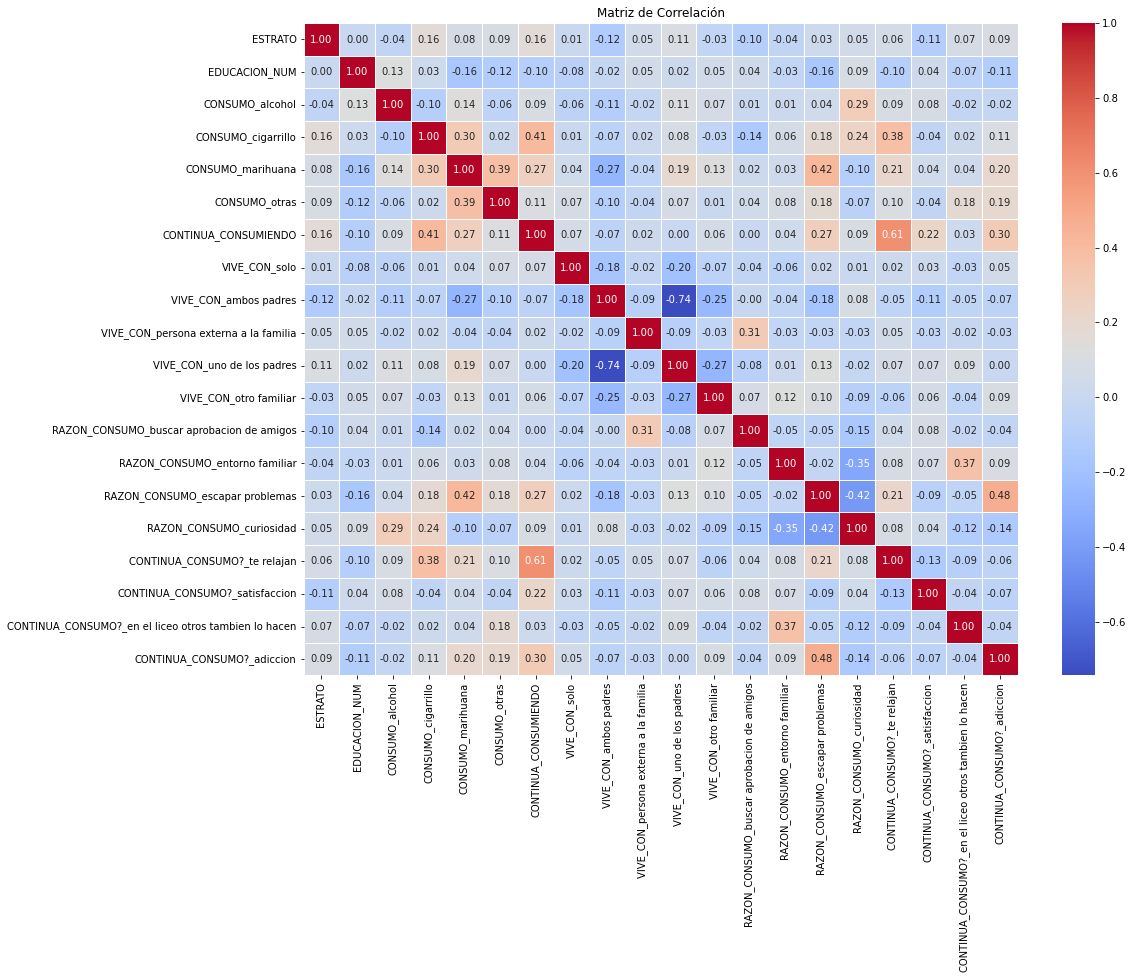

In [42]:
# Then, we created a correlation matrix among all the columns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['ESTRATO', 'EDUCACION_NUM', 'CONSUMO_alcohol', 'CONSUMO_cigarrillo',
                   'CONSUMO_marihuana', 'CONSUMO_otras','CONTINUA_CONSUMIENDO',
                   'VIVE_CON_solo', 'VIVE_CON_ambos padres', 'VIVE_CON_persona externa a la familia',
                   'VIVE_CON_uno de los padres', 'VIVE_CON_otro familiar',
                   'RAZON_CONSUMO_buscar aprobacion de amigos', 'RAZON_CONSUMO_entorno familiar',
                   'RAZON_CONSUMO_escapar problemas',
                   'RAZON_CONSUMO_curiosidad',
                   'CONTINUA_CONSUMO?_te relajan', 'CONTINUA_CONSUMO?_satisfaccion',
                   'CONTINUA_CONSUMO?_en el liceo otros tambien lo hacen',
                   'CONTINUA_CONSUMO?_adiccion']


numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [45]:
X = data[['CONSUMO_cigarrillo', 'RAZON_CONSUMO_escapar problemas','CONTINUA_CONSUMO?_te relajan']]
y = data['CONTINUA_CONSUMIENDO']

# training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# we created a random forrest model
model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)

# we trained the model
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
model.fit(X_train, y_train)

Cross-Validation Scores: [0.77419355 0.90322581 0.83333333 0.83333333 0.86666667]
Mean CV Accuracy: 0.8421505376344086


LogisticRegression(max_iter=1000, random_state=42)

In [47]:
# then, we made predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# finally, we printed
print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7435897435897436
AUC-ROC: 0.8084239130434783
Confusion Matrix:
 [[21  2]
 [ 8  8]]


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [49]:
# we compared the performance of both models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7435897435897436
AUC-ROC: 0.8084239130434783
Confusion Matrix:
 [[21  2]
 [ 8  8]]


In [63]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

results_dict = {
    "Métrica": ["Accuracy", "AUC-ROC", "Confusion Matrix"],
    "Valor": [accuracy, auc_roc, conf_matrix]
}

results_df = pd.DataFrame(results_dict)

excel_file = r"C:\Users\rapla\Documents\Mi Repositorio de Tableau\tu_archivo.xlsx"

results_df.to_excel(excel_file, index=False)

In [64]:
data.to_excel("data_nuevo.xlsx", index=False)